<a href="https://colab.research.google.com/github/G0erman/BDE/blob/main/1_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [40]:
# Data Science Libraries
import pandas as pd
import sklearn as sk

# utils
from datetime import datetime

# Preprocessing
from sklearn.model_selection import train_test_split

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Visualization
#import graphviz as gp
import pydotplus
from IPython.display import Image

# Metrics
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score
)

In [13]:
print(f'Default packages in google collab at {datetime.today()}\n')

for pk in [pd, sk]:
  print(f'{pk.__name__}: {pk.__version__}')

Default packages in google collab at 2020-11-14 13:04:30.605388

pandas: 1.1.4
sklearn: 0.22.2.post1


In [14]:
# Pandas configuration to see more rows
pd.get_option('display.max_rows')

60

In [15]:
pd.set_option('display.max_rows',150)

# Read Data

In [16]:
# Dataset
dataset = "http://www.columbia.edu/~rsb2162/SaoPedroetal_2013__UMUAI_DesigningControlledExperiments_cummandlocalfeatures.csv"
df = pd.read_csv(dataset)
print(df.shape)
df.head()

(564, 147)


,DesigningControlledExperiments?,Group,StateChangeMW,All t cnt,All t sum,All t mean,All t stddev,All t min,All t max,All t med,Run cnt,Run t sum,Run t mean,Run t stddev,Run t min,Run t max,Run t med,Cmplt run cnt,Cmplt run t sum,Cmplt run t mean,Cmplt run t stddev,Cmplt run t min,Cmplt run t max,Cmplt run t med,Incmplt run cnt,Incmplt run t sum,Incmplt run t mean,Incmplt run t stddev,Incmplt run t min,Incmplt run t max,Incmplt run t med,Pause cnt,Pause t sum,Pause t mean,Pause t stddev,Pause t min,Pause t max,Pause t med,Data table show cnt,Data table show t sum,...,Cm Pause t min,Cm Pause t max,Cm Pause t med,Cm Data table show cnt,Cm Data table show t sum,Cm Data table show t mean,Cm Data table show t stddev,Cm Data table show t min,Cm Data table show t max,Cm Data table show t med,Cm Hyp table show cnt,Cm Hyp table show t sum,Cm Hyp table show t mean,Cm Hyp table show t stddev,Cm Hyp table show t min,Cm Hyp table show t max,Cm Hyp table show t med,Cm Hyp var change cnt,Cm Hyp var change t sum,Cm Hyp var change t mean,Cm Hyp var change t stddev,Cm Hyp var change t min,Cm Hyp var change t max,Cm Hyp var change t med,Cm Hyp make cnt,Cm Hyp make t sum,Cm Hyp make t mean,Cm Hyp make t stddev,Cm Hyp make t min,Cm Hyp make t max,Cm Hyp make t med,Cm Mw iv change cnt,Cm Mw iv change t sum,Cm Mw iv change t mean,Cm Mw iv change t stddev,Cm Mw iv change t min,Cm Mw iv change t max,Cm Mw iv change t med,Cm CVS cnt,Cm Rept cnt
0,N,2,1,2,18,9.000000,9.899495,2,16,9.0,1,2,2.000000,0.000000,2,2,2.0,1,2,2.000000,0.000000,2,2,2.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,2,43,21.5,3.535534,19,24,21.5,6,53,8.833333,7.250287,4,23,6.5,1,63,63.0,0.000000,63,63,63.0,0,0,0.000000,0.000000,0,0,0.0,0,1
1,N,2,2,5,13,2.600000,1.516575,1,5,2.0,2,3,1.500000,0.707107,1,2,1.5,0,0,0.000000,0.000000,0,0,0.0,2,3,1.5,0.707107,1,2,1.5,2,13,6.5,4.949747,3,10,6.5,0,0,...,1,10,3.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,4,17,4.250000,1.258306,3,6,4.0,1,21,21.0,0.000000,21,21,21.0,6,26,4.333333,3.386247,2,10,2.5,1,1
2,Y,3,1,0,0,0.000000,0.000000,0,0,0.0,0,0,0.000000,0.000000,0,0,0.0,0,0,0.000000,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,4,65,16.250000,13.937360,7,37,10.5,1,80,80.0,0.000000,80,80,80.0,1,2,2.000000,0.000000,2,2,2.0,1,0
3,N,2,1,13,100,7.692308,7.706973,1,27,4.0,3,8,2.666667,2.886751,1,6,1.0,3,8,2.666667,2.886751,1,6,1.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,1,21,...,0,0,0.0,1,21,21.0,0.0,21,21,21.0,1,11,11.0,0.000000,11,11,11.0,5,33,6.600000,5.319774,1,15,5.0,1,35,35.0,0.000000,35,35,35.0,11,82,7.454545,9.953528,2,28,3.0,5,0
4,N,1,1,9,293,32.555556,69.125088,2,216,11.0,3,223,74.333333,122.696101,2,216,5.0,3,223,74.333333,122.696101,2,216,5.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,10,43,4.300000,2.750757,1,10,3.5,2,45,22.5,0.707107,22,23,22.5,1,3,3.000000,0.000000,3,3,3.0,1,2


In [17]:
df.columns

Index(['DesigningControlledExperiments?', ' Group', ' StateChangeMW',
       ' All t cnt', ' All t sum', ' All t mean', ' All t stddev',
       ' All t min', ' All t max', ' All t med',
       ...
       ' Cm Hyp make t med', ' Cm Mw iv change cnt', ' Cm Mw iv change t sum',
       ' Cm Mw iv change t mean', ' Cm Mw iv change t stddev',
       ' Cm Mw iv change t min', ' Cm Mw iv change t max',
       ' Cm Mw iv change t med', ' Cm CVS cnt', ' Cm Rept cnt'],
      dtype='object', length=147)

In [37]:
# I like columns without spaces
columns = [column.strip().replace(' ','_') for column in df.columns]
df.columns = columns
df.columns

Index(['DesigningControlledExperiments?', 'Group', 'StateChangeMW',
       'All_t_cnt', 'All_t_sum', 'All_t_mean', 'All_t_stddev', 'All_t_min',
       'All_t_max', 'All_t_med',
       ...
       'Cm_Hyp_make_t_med', 'Cm_Mw_iv_change_cnt', 'Cm_Mw_iv_change_t_sum',
       'Cm_Mw_iv_change_t_mean', 'Cm_Mw_iv_change_t_stddev',
       'Cm_Mw_iv_change_t_min', 'Cm_Mw_iv_change_t_max',
       'Cm_Mw_iv_change_t_med', 'Cm_CVS_cnt', 'Cm_Rept_cnt'],
      dtype='object', length=147)

In [19]:
df.head()

,DesigningControlledExperiments?,Group,StateChangeMW,All_t_cnt,All_t_sum,All_t_mean,All_t_stddev,All_t_min,All_t_max,All_t_med,Run_cnt,Run_t_sum,Run_t_mean,Run_t_stddev,Run_t_min,Run_t_max,Run_t_med,Cmplt_run_cnt,Cmplt_run_t_sum,Cmplt_run_t_mean,Cmplt_run_t_stddev,Cmplt_run_t_min,Cmplt_run_t_max,Cmplt_run_t_med,Incmplt_run_cnt,Incmplt_run_t_sum,Incmplt_run_t_mean,Incmplt_run_t_stddev,Incmplt_run_t_min,Incmplt_run_t_max,Incmplt_run_t_med,Pause_cnt,Pause_t_sum,Pause_t_mean,Pause_t_stddev,Pause_t_min,Pause_t_max,Pause_t_med,Data_table_show_cnt,Data_table_show_t_sum,...,Cm_Pause_t_min,Cm_Pause_t_max,Cm_Pause_t_med,Cm_Data_table_show_cnt,Cm_Data_table_show_t_sum,Cm_Data_table_show_t_mean,Cm_Data_table_show_t_stddev,Cm_Data_table_show_t_min,Cm_Data_table_show_t_max,Cm_Data_table_show_t_med,Cm_Hyp_table_show_cnt,Cm_Hyp_table_show_t_sum,Cm_Hyp_table_show_t_mean,Cm_Hyp_table_show_t_stddev,Cm_Hyp_table_show_t_min,Cm_Hyp_table_show_t_max,Cm_Hyp_table_show_t_med,Cm_Hyp_var_change_cnt,Cm_Hyp_var_change_t_sum,Cm_Hyp_var_change_t_mean,Cm_Hyp_var_change_t_stddev,Cm_Hyp_var_change_t_min,Cm_Hyp_var_change_t_max,Cm_Hyp_var_change_t_med,Cm_Hyp_make_cnt,Cm_Hyp_make_t_sum,Cm_Hyp_make_t_mean,Cm_Hyp_make_t_stddev,Cm_Hyp_make_t_min,Cm_Hyp_make_t_max,Cm_Hyp_make_t_med,Cm_Mw_iv_change_cnt,Cm_Mw_iv_change_t_sum,Cm_Mw_iv_change_t_mean,Cm_Mw_iv_change_t_stddev,Cm_Mw_iv_change_t_min,Cm_Mw_iv_change_t_max,Cm_Mw_iv_change_t_med,Cm_CVS_cnt,Cm_Rept_cnt
0,N,2,1,2,18,9.000000,9.899495,2,16,9.0,1,2,2.000000,0.000000,2,2,2.0,1,2,2.000000,0.000000,2,2,2.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,2,43,21.5,3.535534,19,24,21.5,6,53,8.833333,7.250287,4,23,6.5,1,63,63.0,0.000000,63,63,63.0,0,0,0.000000,0.000000,0,0,0.0,0,1
1,N,2,2,5,13,2.600000,1.516575,1,5,2.0,2,3,1.500000,0.707107,1,2,1.5,0,0,0.000000,0.000000,0,0,0.0,2,3,1.5,0.707107,1,2,1.5,2,13,6.5,4.949747,3,10,6.5,0,0,...,1,10,3.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,4,17,4.250000,1.258306,3,6,4.0,1,21,21.0,0.000000,21,21,21.0,6,26,4.333333,3.386247,2,10,2.5,1,1
2,Y,3,1,0,0,0.000000,0.000000,0,0,0.0,0,0,0.000000,0.000000,0,0,0.0,0,0,0.000000,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,4,65,16.250000,13.937360,7,37,10.5,1,80,80.0,0.000000,80,80,80.0,1,2,2.000000,0.000000,2,2,2.0,1,0
3,N,2,1,13,100,7.692308,7.706973,1,27,4.0,3,8,2.666667,2.886751,1,6,1.0,3,8,2.666667,2.886751,1,6,1.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,1,21,...,0,0,0.0,1,21,21.0,0.0,21,21,21.0,1,11,11.0,0.000000,11,11,11.0,5,33,6.600000,5.319774,1,15,5.0,1,35,35.0,0.000000,35,35,35.0,11,82,7.454545,9.953528,2,28,3.0,5,0
4,N,1,1,9,293,32.555556,69.125088,2,216,11.0,3,223,74.333333,122.696101,2,216,5.0,3,223,74.333333,122.696101,2,216,5.0,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,0,0,...,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0.0,0.000000,0,0,0.0,10,43,4.300000,2.750757,1,10,3.5,2,45,22.5,0.707107,22,23,22.5,1,3,3.000000,0.000000,3,3,3.0,1,2


In [42]:
df.dtypes[:10]

DesigningControlledExperiments?     object
Group                                int64
StateChangeMW                        int64
All_t_cnt                            int64
All_t_sum                            int64
All_t_mean                         float64
All_t_stddev                       float64
All_t_min                            int64
All_t_max                            int64
All_t_med                          float64
dtype: object

In [54]:
# The label should be numerical
df.rename(columns={'DesigningControlledExperiments?':'label'}, inplace=True)
df[['label']] = df.label.apply(lambda x: 1 if x == 'Y' else 0)
df.label.value_counts()

0    388
1    176
Name: label, dtype: int64

# Decision Trees models

In [55]:
# Features, all columns except the target
X = df.drop('label',axis=1)
print(X.shape)

# The target is DesigningControlledExperiments?
y = df[['label']]
print(y.shape)

(564, 146)
(564, 1)


In [56]:
# Split dataset, 80% to training 20% to testing
# Using seed equals to 27 to reply the study
seed = 27

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed)
print(x_train.shape)

(451, 146)


In [68]:
# Apply Classifier
dtc = DecisionTreeClassifier(random_state=seed, max_depth=4)
dtc = dtc.fit(x_train, y_train)

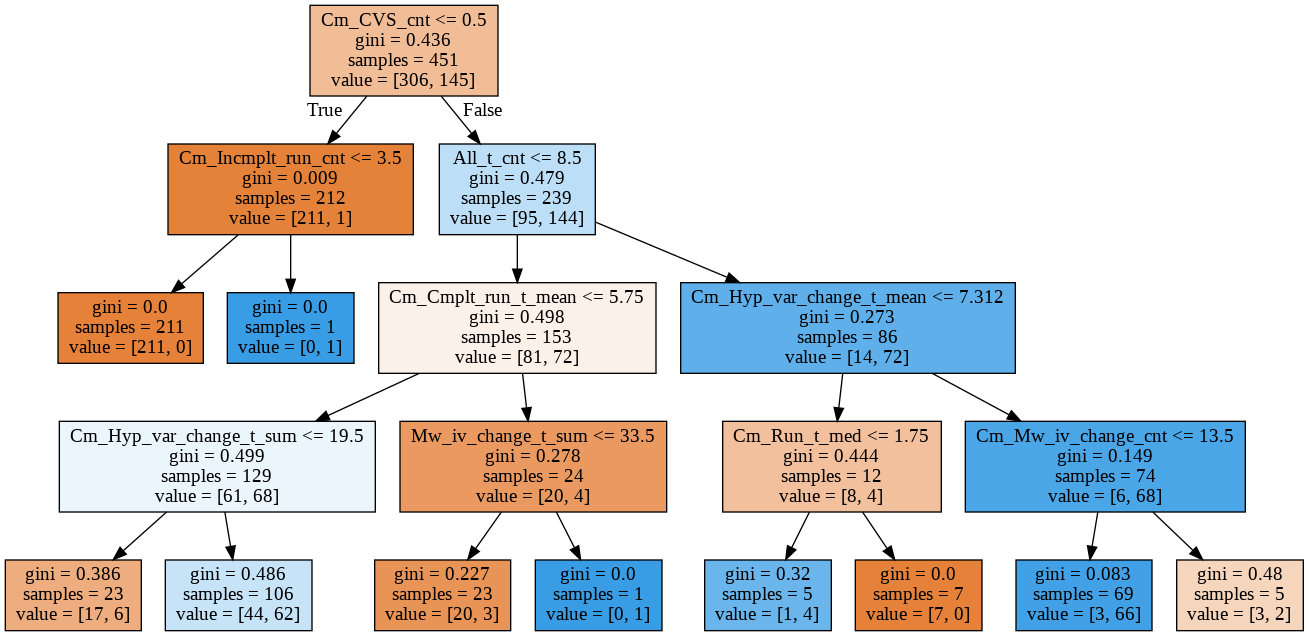

In [69]:
# Draw tree
dot_data = tree.export_graphviz(
    dtc, 
    feature_names=X.columns, 
    filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [70]:
# Predictions
predictions = dtc.predict(x_test)
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test,predictions)}')
print(f'Accuracy: {accuracy_score(y_test,predictions)}')

Precision: 0.5675675675675675
Recall: 0.6774193548387096
Accuracy: 0.7699115044247787


### Tune Decision Tree

In [71]:
"""
Next steps: 

* Improve the depth of the tree
* Explain the results with confusion matrix
"""